# 기본 설정

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas  #shp 파일 확인을 위한 geopandas 라이브러리 설치

In [ ]:
#나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import geopandas as gpd # shp파일을 열기위한 geopandas 불러오기
import pandas as pd # 데이터 프레임을 활용하여 데이터 분석을 하기 위해 pandas 불러오기
import matplotlib.pyplot as plt #시각화를 위한 matplotlib 불러오기
import seaborn as sns
import missingno as msno # 결측치 시각화를 위한 missingno 불러오기
import warnings
warnings.filterwarnings(action='ignore') # 코드 경고를 무시 하기 위한 라이브러리 불러오기
import matplotlib.font_manager as fm
import matplotlib as mpl

In [2]:
mpl.get_cachedir()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False # -값 깨짐을 방지하기 위한 설정
plt.rcParams['figure.figsize'] = (8,10)
plt.rcParams['font.size'] = 20

# 2022년 데이터 산업 인력양성 교육 프로젝트 데이
## - 주제 : 경기도 자연재해 데이터 기반 위험 지역 알림 서비스
## - 팀명 : 어쩔 침수
## - 서비스 이름 : 침수탈출 넘버원
## - 팀원 소개
|이름|학과|
|:-------:|:------:|
|김민걸|산업경영공학과|
|김서윤|응용통계학과||
|박하은|국제학과|
|신현식|응용통계학과|
|이영근|영미어문학과|



##1. 행정안전부에서 주민등록 주소 코드를 이용해 경기도 행정구역 코드 데이터 수집
##### (https://www.mois.go.kr/frt/bbs/type001/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000052&nttId=83647)


In [4]:
# csv파일 경로 저장
js_data = '/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/행정구역 코드/KIKmix.20210401.csv'

In [5]:
# 파일 불러오기
js = pd.read_csv(js_data,encoding = 'UTF-8')
js.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [6]:
# 데이터 확인
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동코드   21726 non-null  int64  
 1   시도명     21726 non-null  object 
 2   시군구명    21556 non-null  object 
 3   읍면동명    21434 non-null  object 
 4   법정동코드   21726 non-null  int64  
 5   동리명     21712 non-null  object 
 6   생성일자    21726 non-null  int64  
 7   말소일자    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ MB


In [7]:
# 경기도 데이터만 저장
gyeonggi_js = js[js['시도명']=='경기도']
gyeonggi_js.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
2791,4100000000,경기도,NaN,NaN,4100000000,경기도,19880423,NaN
2793,4111000000,경기도,수원시,NaN,4111000000,수원시,19880423,NaN
2794,4111100000,경기도,수원시 장안구,NaN,4111100000,수원시장안구,19880701,NaN
2795,4111156000,경기도,수원시 장안구,파장동,4111112900,파장동,20031124,NaN
2796,4111156000,경기도,수원시 장안구,파장동,4111113100,이목동,20031124,NaN


In [8]:
# 데이터 정보
gyeonggi_js.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2442 entries, 2791 to 5233
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동코드   2442 non-null   int64  
 1   시도명     2442 non-null   object 
 2   시군구명    2441 non-null   object 
 3   읍면동명    2389 non-null   object 
 4   법정동코드   2442 non-null   int64  
 5   동리명     2438 non-null   object 
 6   생성일자    2442 non-null   int64  
 7   말소일자    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 171.7+ KB


In [9]:
# 법정동 코드 규칙 확인
# 41로 시작하는 것 같음
gyeonggi_js['법정동코드'].value_counts()

4117110100    11
4121010100     7
4141010400     6
4117310400     6
4139013200     6
              ..
4148037026     1
4148037025     1
4148037024     1
4148037023     1
4183041033     1
Name: 법정동코드, Length: 2214, dtype: int64

In [10]:
#41로 시작하는 코드만 테이블로 만들어봄
#2442개로 동일 경기도는 행정구역 코드가 41로 시작한다.
js = js.astype({'법정동코드':'string'})
js = js[js['법정동코드'].str.startswith('41')]
gyeonggi_js.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2442 entries, 2791 to 5233
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동코드   2442 non-null   int64  
 1   시도명     2442 non-null   object 
 2   시군구명    2441 non-null   object 
 3   읍면동명    2389 non-null   object 
 4   법정동코드   2442 non-null   int64  
 5   동리명     2438 non-null   object 
 6   생성일자    2442 non-null   int64  
 7   말소일자    0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 171.7+ KB


## 2. 한국국토정보공사의 전국 침수흔적정보 침수위선 데이터셋 수집
##### (https://www.data.go.kr/data/15048627/fileData.do)

In [11]:
# 파일 경로를 level_data에 저장
level_data = '/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/침수위정보/침수위선(https:  www.data.go.kr data 15048627 fileData.do)/FL_CHIMWL.shp'

In [12]:
# 파일을 로드, 한글이 있기때문에 CP949로 인코딩
level = gpd.read_file(level_data,encoding = 'CP949' )

In [13]:
  #level.to_csv("/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/침수위데이터원형.csv", mode='w',encoding='EUC-KR') #데이터 프레임을 csv로 변환해서 내보내기

In [14]:
# 데이터 프레임 확인
level.head()

,OBJECTID,FWTL_LN_SN,JOB_SE_CD,F_DSSTR_NM,EXMN_YEAR,AVG_FLDWTL,FLUD_AR,F_CDTL_NM,ADM_CD,DATA_SN,...,F_CAUSE_CD,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,FLUD_YEAR,LX_AT,ATCH_FID,SHAPE_AREA,SHAPE_LEN,geometry
0,161,11615,FJS003,집중호우로 인한 침수,2006,462.01,34450.0,우수유입에 의한 농경지 침수,4273033023,17039,...,02,영랑지구,2.570000e+10,24,2006,Y,23,2.411911e+04,1844.586106,"MULTIPOLYGON (((1061310.066 1940863.349, 10613..."
1,291,11715,FJS003,6.30 집중호우 및 제 3호 테풍 에위니아,2006,0.25,1902366.0,농경지 매몰 및 침수,5013025000,20013,...,02,서귀포시 대정읍 보성리일원 (,0.000000e+00,0,2006,Y,23,2.068612e+06,25508.782272,"MULTIPOLYGON (((885629.110 1475914.036, 885638..."
2,487,11421,FJS003,수해(집중호우에 의한 농경지 침수),2006,6.59,1567873.0,낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,4157010700,10280,...,03,"김포 풍무동,테리지구",2.100000e+09,48,2006,Y,23,1.974162e+06,10015.099728,"POLYGON ((931712.179 1955068.577, 931702.015 1..."
3,496,11588,FJS003,집중호우로 인한 침수,2006,302.58,38953.0,우수유입에 의한 농경지 침수,4273035023,16096,...,02,춘당2-1지구,2.570000e+10,24,2006,Y,23,3.023731e+03,650.534504,"POLYGON ((1056377.721 1957910.707, 1056418.126..."
4,538,11623,FJS003,집중호우로 인한 침수,2006,492.04,8562.0,우수유입에 의한 농경지 침수,4273033021,17037,...,02,현천2지구,2.570000e+10,24,2006,Y,23,8.480919e+03,402.705660,"POLYGON ((1058022.491 1942371.808, 1058084.144..."


In [15]:
# 컬럼 이름 확인
level.columns

Index(['OBJECTID', 'FWTL_LN_SN', 'JOB_SE_CD', 'F_DSSTR_NM', 'EXMN_YEAR',
       'AVG_FLDWTL', 'FLUD_AR', 'F_CDTL_NM', 'ADM_CD', 'DATA_SN', 'F_BEGIN_DE',
       'F_END_DE', 'F_BEGIN_HM', 'F_END_HM', 'F_CAUSE_CD', 'F_DSTRC_NM',
       'DMG_AMT', 'FLUD_HOUR', 'FLUD_YEAR', 'LX_AT', 'ATCH_FID', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

### 주요 컬럼 설명
|컬럼명|설명|
|---|---|
|OBJECTID_1|공간정보 객체 아이디|
|F_DSSTR_NM|침수 재해 명|
|EXMN_YEAR|침수 피해 조사 년도|
|F_CDTL_NM|침수 원인 상세 명|
|ADM_CD|행정구역 코드|
|F_BEGIN_DE|침수 시작 시각|
|F_END_DE|침수 종료 시각|
|F_CAUSE_CD|침수 장소|
|F_DSTRC_NM|침수 지구 명|
|DMG_AMT|피해 금액|
|FLUD_HOUR|침수 피해 시간|
|FLUD_YEAR|침수 피해 년도|
|geometry|폴리곤 주소|

In [16]:
# 데이터 프레임 정보 확인
level.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17779 entries, 0 to 17778
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    17779 non-null  int64   
 1   FWTL_LN_SN  17779 non-null  int64   
 2   JOB_SE_CD   13870 non-null  object  
 3   F_DSSTR_NM  17777 non-null  object  
 4   EXMN_YEAR   17762 non-null  object  
 5   AVG_FLDWTL  17779 non-null  float64 
 6   FLUD_AR     17779 non-null  float64 
 7   F_CDTL_NM   11215 non-null  object  
 8   ADM_CD      11530 non-null  object  
 9   DATA_SN     17779 non-null  int64   
 10  F_BEGIN_DE  11526 non-null  object  
 11  F_END_DE    11528 non-null  object  
 12  F_BEGIN_HM  11490 non-null  object  
 13  F_END_HM    11490 non-null  object  
 14  F_CAUSE_CD  10123 non-null  object  
 15  F_DSTRC_NM  15414 non-null  object  
 16  DMG_AMT     17779 non-null  float64 
 17  FLUD_HOUR   17779 non-null  int64   
 18  FLUD_YEAR   17779 non-null  object  
 

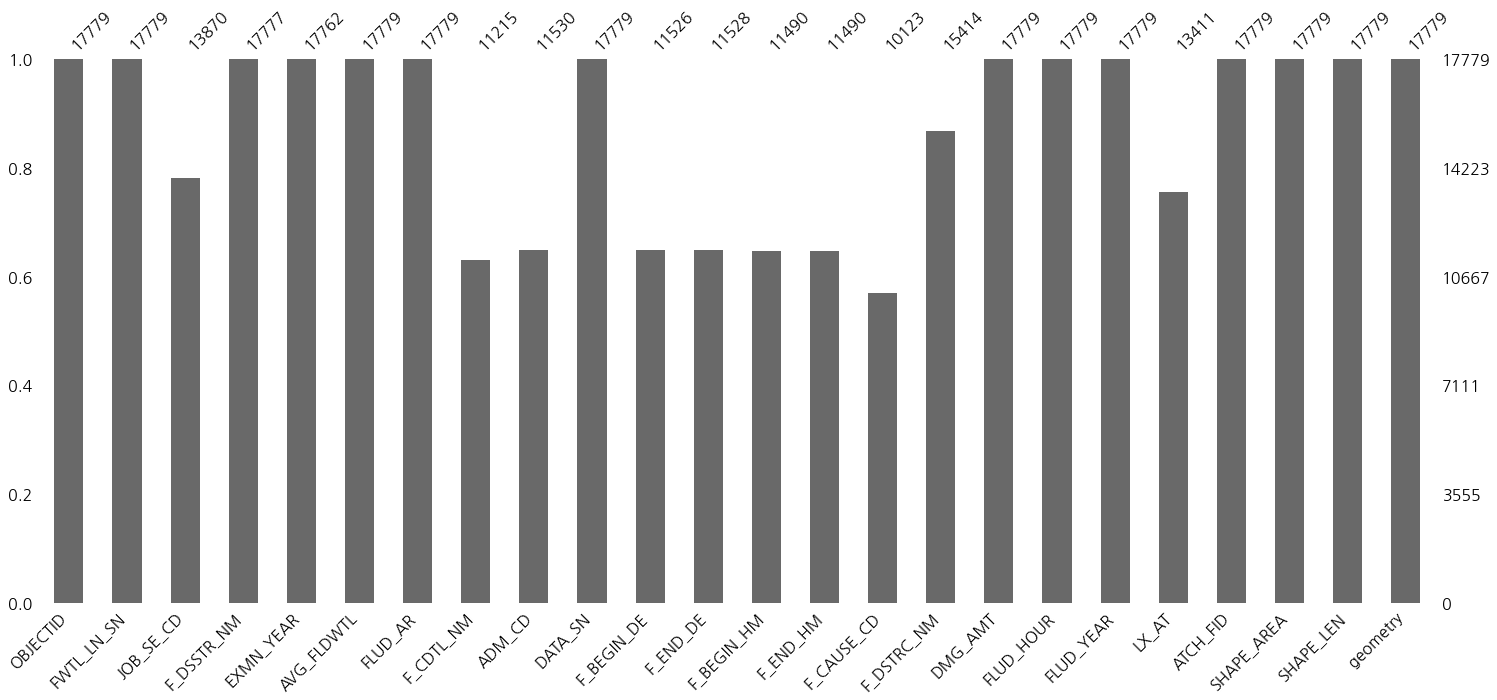

In [17]:
# 결측치 확인
msno.bar(level)

In [18]:
# 경기도의 침수피해 정보를 저장하기 위해 ADM_CD컬럼 사용
# ADM_CD컬럼의 결측치가 서울인 것을 엑셀 파일로 확인
# 결측치는 제거 하기로 결정
level.dropna(subset = ['ADM_CD'],inplace = True) # 결측치 제거 하고 inpllace = True로 하여 저장
level['ADM_CD'].isnull().sum() # 결측치 제거 후 결측치 확인

0

In [19]:
# 경기도의 행정동 코드가 41로 시작함을 착안하여 전국 침수정보에서 경기도에 속하는 구역만 가져옴
gyeonggi_level = level[level['ADM_CD'].str.startswith('41')]
gyeonggi_level.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2173 entries, 2 to 17778
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2173 non-null   int64   
 1   FWTL_LN_SN  2173 non-null   int64   
 2   JOB_SE_CD   1680 non-null   object  
 3   F_DSSTR_NM  2173 non-null   object  
 4   EXMN_YEAR   2173 non-null   object  
 5   AVG_FLDWTL  2173 non-null   float64 
 6   FLUD_AR     2173 non-null   float64 
 7   F_CDTL_NM   2022 non-null   object  
 8   ADM_CD      2173 non-null   object  
 9   DATA_SN     2173 non-null   int64   
 10  F_BEGIN_DE  2173 non-null   object  
 11  F_END_DE    2173 non-null   object  
 12  F_BEGIN_HM  2170 non-null   object  
 13  F_END_HM    2170 non-null   object  
 14  F_CAUSE_CD  2172 non-null   object  
 15  F_DSTRC_NM  2173 non-null   object  
 16  DMG_AMT     2173 non-null   float64 
 17  FLUD_HOUR   2173 non-null   int64   
 18  FLUD_YEAR   2173 non-null   object  
 1

Text(0.5, 1.0, '연도별 침수 빈도')

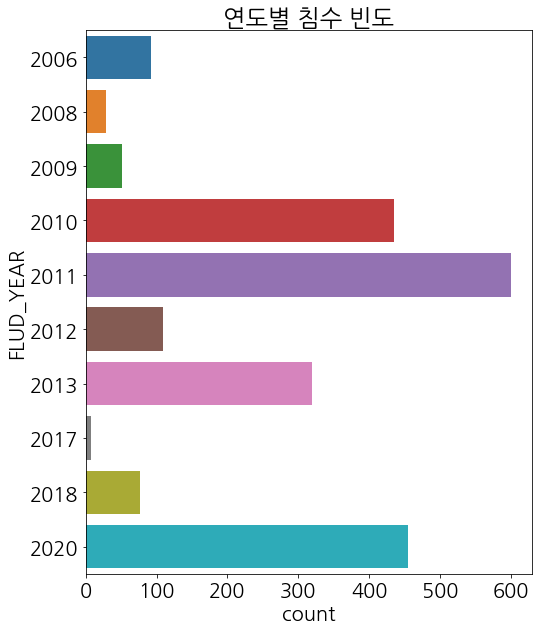

In [20]:
# 침수년도 시각화
bar = sns.countplot(y = 'FLUD_YEAR', data = gyeonggi_level)
plt.title("연도별 침수 빈도")

Text(0.5, 1.0, '침수 시간별 분포')

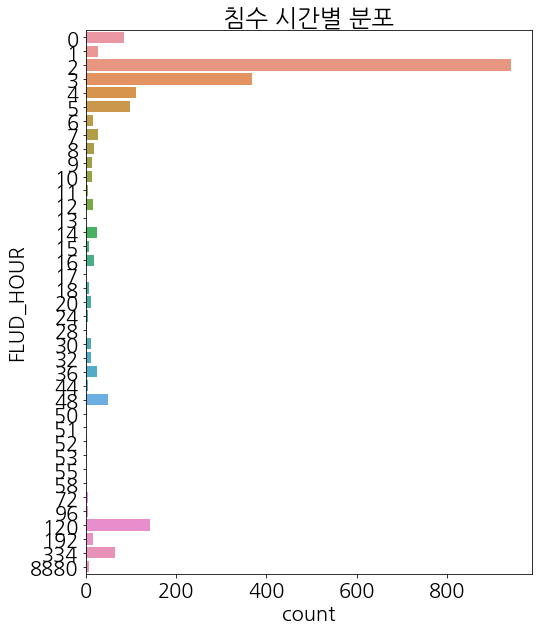

In [21]:
# 침수시간별 분포
sns.countplot(y='FLUD_HOUR', data = gyeonggi_level)
plt.title("침수 시간별 분포")

In [22]:
# 필요한 컬럼만 추출해서 저장
pd.options.display.float_format = '{:.1f}'.format
gyeonggi_level = gyeonggi_level[[ 'ADM_CD','F_DSSTR_NM','F_CDTL_NM','F_BEGIN_DE',
       'F_END_DE','F_DSTRC_NM','DMG_AMT','FLUD_HOUR','geometry']]
gyeonggi_level.reset_index(drop = True ,inplace = True)       
gyeonggi_level.head()

,ADM_CD,F_DSSTR_NM,F_CDTL_NM,F_BEGIN_DE,F_END_DE,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,geometry
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,20060712,20060717,"김포 풍무동,테리지구",2100000000.0,48,"POLYGON ((931712.179 1955068.577, 931702.015 1..."
1,4155012700,7.26집중호우및 제3호태풍 에위니아,"하천제방붕괴,주택파손및 농경지 매몰 침수",20060728,20060729,안성가현지구,17312302000.0,14,"POLYGON ((980571.881 1889616.679, 980568.553 1..."
2,4157025025,수해(집중호우에 의한 농경지 침수),배수로의 미정비와 상류에 비하여 하류의 하폭이 좁아 범람함,20060712,20060717,통진읍 가현리지구,2100000000.0,48,"POLYGON ((920617.723 1965150.325, 920618.160 1..."
3,4167031033,집중호우,농경지 침수,20060715,20060718,점동면 도리 일원,0.0,72,"MULTIPOLYGON (((1018238.585 1914273.964, 10182..."
4,4157010200,수해(집중호우에 의한 농경지 침수),운양배수 펌프장 배수용량 부족으로 내수에 의한 침수,20060712,20060717,"북변,걸포동지구",2100000000.0,48,"POLYGON ((931745.471 1958819.570, 931656.073 1..."


In [23]:
gyeonggi_level.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      2173 non-null   object  
 1   F_DSSTR_NM  2173 non-null   object  
 2   F_CDTL_NM   2022 non-null   object  
 3   F_BEGIN_DE  2173 non-null   object  
 4   F_END_DE    2173 non-null   object  
 5   F_DSTRC_NM  2173 non-null   object  
 6   DMG_AMT     2173 non-null   float64 
 7   FLUD_HOUR   2173 non-null   int64   
 8   geometry    2173 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(6)
memory usage: 152.9+ KB


## 3. 한국국토정보공사의 태풍,호우 등으로 인한 강우량 데이터 에서 경기도 내의 강수량만 수집
##### (https://www.data.go.kr/data/15048637/fileData.do?recommendDataYn=Y)

In [24]:
# csv 파일 경로 저장
rain_data = '/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/한국국토정보공사_침수흔적정보 시간별 강우량/FL_TIMERAIN.csv'

In [25]:
# 파일 불러오기
rain = pd.read_csv(rain_data,encoding = 'CP949')
rain.head()

,행정구역코드,시간 강수량,순번,강수 년월일시,강수 시간
0,4157000000,0.0,10267,2006-07-13,20
1,4157000000,0.0,10267,2006-07-13,21
2,4157000000,0.0,10267,2006-07-13,22
3,4157000000,0.0,10267,2006-07-13,23
4,4157000000,0.0,10267,2006-07-13,24


In [26]:
# 데이터 정보 보기
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154049 entries, 0 to 154048
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   행정구역코드   154049 non-null  int64  
 1   시간 강수량   154049 non-null  float64
 2   순번       154049 non-null  int64  
 3   강수 년월일시  154049 non-null  object 
 4   강수 시간    154049 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 5.9+ MB


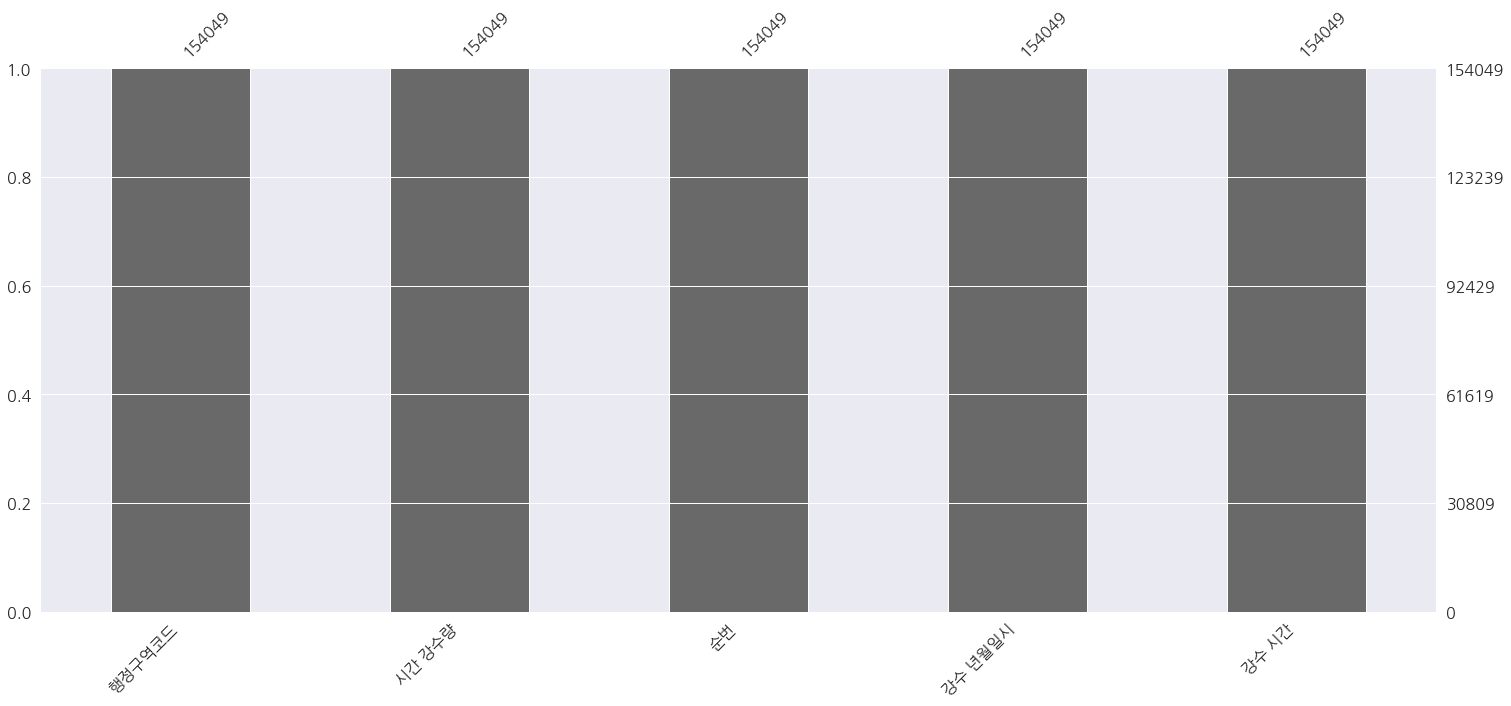

In [27]:
# 결측치 확인, 결측치 없음
sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False})
msno.bar(rain)
plt.show()

In [28]:
# 경기도 강수량만 구하기 위한작업
rain = rain.astype({'행정구역코드':'string'})
rain = rain[rain['행정구역코드'].str.startswith('41')]
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34440 entries, 0 to 153114
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역코드   34440 non-null  string 
 1   시간 강수량   34440 non-null  float64
 2   순번       34440 non-null  int64  
 3   강수 년월일시  34440 non-null  object 
 4   강수 시간    34440 non-null  int64  
dtypes: float64(1), int64(2), object(1), string(1)
memory usage: 1.6+ MB


In [29]:
rain.columns

Index(['행정구역코드', '시간 강수량', '순번', '강수 년월일시', '강수 시간'], dtype='object')

In [30]:
# 필요한 컬럼만 추출 후 저장
rain = rain[['행정구역코드', '시간 강수량','강수 년월일시', '강수 시간']]
rain.reset_index(drop = True,inplace = True)
rain.head()

,행정구역코드,시간 강수량,강수 년월일시,강수 시간
0,4157000000,0.0,2006-07-13,20
1,4157000000,0.0,2006-07-13,21
2,4157000000,0.0,2006-07-13,22
3,4157000000,0.0,2006-07-13,23
4,4157000000,0.0,2006-07-13,24


In [31]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34440 entries, 0 to 34439
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역코드   34440 non-null  string 
 1   시간 강수량   34440 non-null  float64
 2   강수 년월일시  34440 non-null  object 
 3   강수 시간    34440 non-null  int64  
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 1.1+ MB


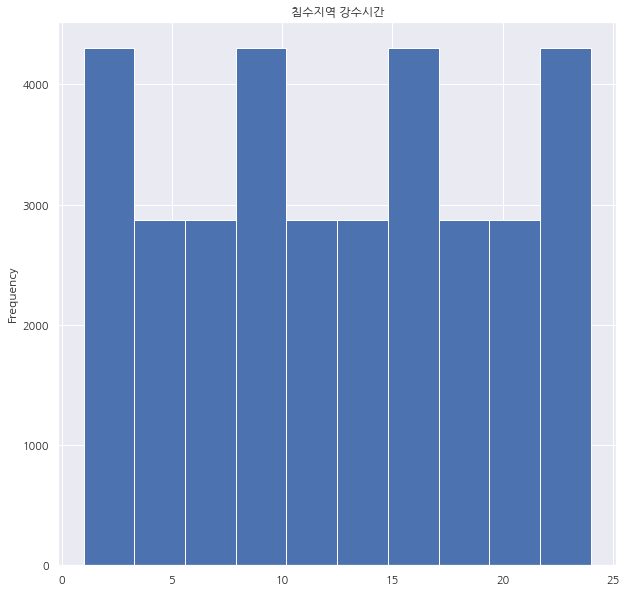

In [32]:
# 시각화 및 분석 - 강수시간
#gyeonggi_level = gyeonggi_level.astype({'FLUD_YEAR':'int64'})
data =  pd.Series(rain['강수 시간'])
data.plot(kind='hist',grid=True, title='침수지역 강수시간',figsize = (10,10))

## 4. 한국국토정보공사의 침수흔적정보 대피소 데이터에서 경기도 내의 대피소만 수집
##### (https://www.data.go.kr/data/15048639/fileData.do?recommendDataYn=Y)

In [33]:
# 데이터 경로 저장
shelter_data = '/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/한국국토정보공사_침수흔적 정보 대피소/FL_RESCUE_SP.shp'

In [34]:
# 데이터 불러오기
shelter = gpd.read_file(shelter_data, encoding = 'CP949')
shelter

,ADM_CD,SIDO_NM,SGG_NM,DONG_NM,RI_NM,JIBUN,SHELTER_NM,SHELTER_DI,SHELTER_AR,X,Y,geometry
0,1168010700,서울특별시,강남구,신사동,None,501번지,신사지하철역,공공시설,1280 ㎡,201681.0,446075.0,POINT (201681.000 446075.000)
1,1168011000,서울특별시,강남구,신사동,None,(압구정동429),현대백화점,민간시설,8844 ㎡,202358.0,447238.0,POINT (202358.000 447238.000)
2,1168010300,서울특별시,강남구,개포동,None,654번지(203204205206208211동),현대2차아파트,민간시설,3897 ㎡,204467.0,442265.0,POINT (204467.000 442265.000)
3,1168010300,서울특별시,강남구,개포동,None,654번지(201202207209212동),현대2차아파트,민간시설,4000 ㎡,204403.0,442292.0,POINT (204403.000 442292.000)
4,1168010300,서울특별시,강남구,개포동,None,655번지1호(210213동),현대2차아파트,민간시설,700 ㎡,204589.0,442176.0,POINT (204589.000 442176.000)
...,...,...,...,...,...,...,...,...,...,...,...,...
22701,3017011200,대전광역시,서구,둔산동,None,909번지,[둔산2동] 수정타운2단지아파트 지하주차장,민간시설,17210.18 ㎡,235604.0,317698.0,POINT (235604.000 317698.000)
22702,None,None,None,None,None,None,None,None,None,NaN,NaN,None
22703,None,None,None,None,None,None,None,None,None,NaN,NaN,None
22704,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [35]:
# 데이터 프레임 정보 확인
shelter.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22706 entries, 0 to 22705
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      22702 non-null  object  
 1   SIDO_NM     22702 non-null  object  
 2   SGG_NM      22702 non-null  object  
 3   DONG_NM     22285 non-null  object  
 4   RI_NM       2770 non-null   object  
 5   JIBUN       22595 non-null  object  
 6   SHELTER_NM  22702 non-null  object  
 7   SHELTER_DI  22701 non-null  object  
 8   SHELTER_AR  22702 non-null  object  
 9   X           22702 non-null  float64 
 10  Y           22702 non-null  float64 
 11  geometry    22702 non-null  geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 2.1+ MB


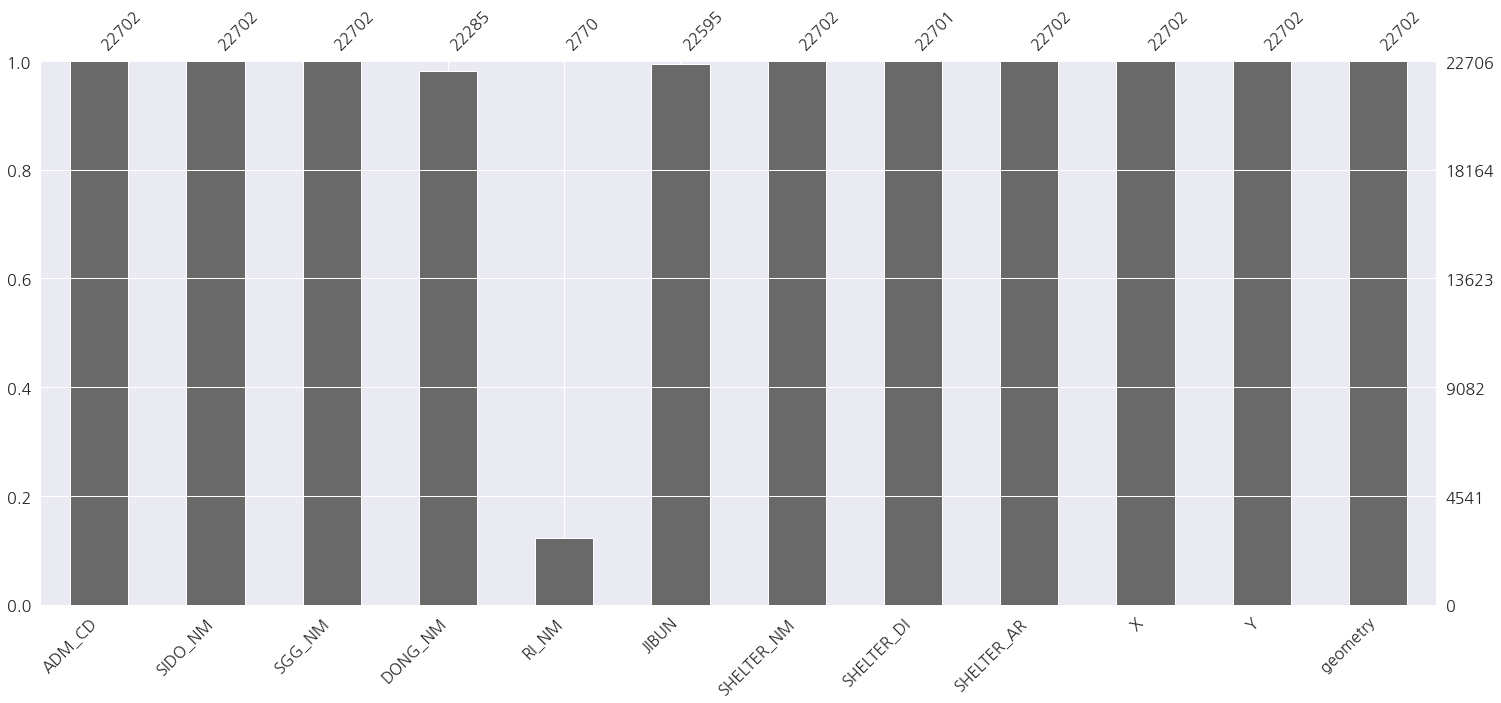

In [36]:
# 결측치 확인
msno.bar(shelter)

In [37]:
# ADM_CD(행정구역 코드) 컬럼 결측치 확인
shelter['ADM_CD'].isnull().sum()

4

In [38]:
# 결측치 4개는 데이터 크기에 비해 무시 가능한 정도라고 판단, drop
shelter.dropna(subset = ['ADM_CD'],inplace = True)
shelter['ADM_CD'].isnull().sum()

0

In [39]:
# 경기도의 행정동 코드가 41로 시작함을 착안하여 전국 침수정보에서 경기도에 속하는 대피소만 수집
gyeonggi_shelter = shelter[shelter['ADM_CD'].str.startswith('41')]
gyeonggi_shelter.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4229 entries, 10807 to 16362
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      4229 non-null   object  
 1   SIDO_NM     4229 non-null   object  
 2   SGG_NM      4229 non-null   object  
 3   DONG_NM     4229 non-null   object  
 4   RI_NM       637 non-null    object  
 5   JIBUN       4214 non-null   object  
 6   SHELTER_NM  4229 non-null   object  
 7   SHELTER_DI  4229 non-null   object  
 8   SHELTER_AR  4229 non-null   object  
 9   X           4229 non-null   float64 
 10  Y           4229 non-null   float64 
 11  geometry    4229 non-null   geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 429.5+ KB


In [40]:
gyeonggi_shelter.columns

Index(['ADM_CD', 'SIDO_NM', 'SGG_NM', 'DONG_NM', 'RI_NM', 'JIBUN',
       'SHELTER_NM', 'SHELTER_DI', 'SHELTER_AR', 'X', 'Y', 'geometry'],
      dtype='object')

In [41]:
# 필요한 데이터만 추출해서 저장
gyeonggi_shelter = gyeonggi_shelter[['ADM_CD', 'SIDO_NM', 'SGG_NM', 'DONG_NM','JIBUN',
       'SHELTER_NM', 'SHELTER_DI','geometry']]
gyeonggi_shelter.reset_index(drop = True ,inplace = True)       
gyeonggi_shelter.head()  

,ADM_CD,SIDO_NM,SGG_NM,DONG_NM,JIBUN,SHELTER_NM,SHELTER_DI,geometry
0,4121010400,경기도,광명시,소하1동,1294번지소하휴먼시아5단지아파트,휴먼시아5단지아파트,민간시설,POINT (189959.000 438884.000)
1,4121010400,경기도,광명시,소하1동,1324번지소하휴먼시아6단지아파트,휴먼시아6단지아파트,민간시설,POINT (190239.000 438250.000)
2,4121010400,경기도,광명시,소하1동,1273번지어울림아파트,금호어울림아파트,민간시설,POINT (190114.000 438890.000)
3,4121010400,경기도,광명시,소하1동,48번지55호동양2차아파트,동양2차아파트,민간시설,POINT (190011.000 439164.000)
4,4121010400,경기도,광명시,소하2동,940번지미도3차아파트,미도3차아파트,민간시설,POINT (189049.000 436923.000)


In [42]:
gyeonggi_shelter.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      4229 non-null   object  
 1   SIDO_NM     4229 non-null   object  
 2   SGG_NM      4229 non-null   object  
 3   DONG_NM     4229 non-null   object  
 4   JIBUN       4214 non-null   object  
 5   SHELTER_NM  4229 non-null   object  
 6   SHELTER_DI  4229 non-null   object  
 7   geometry    4229 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 264.4+ KB


In [43]:
gyeonggi_shelter['SGG_NM'].value_counts()

김포시        294
안산시단원구     194
안양시동안구     185
부천시원미구     176
평택시        167
파주시        161
시흥시        159
고양시덕양구     155
성남시분당구     137
고양시일산서구    126
의정부시       124
수원시팔달구     118
광명시        117
남양주시       111
용인시기흥구     106
화성시        105
안산시상록구     104
고양시일산동구    104
의왕시        100
성남시중원구      93
수원시영통구      93
수원시장안구      89
성남시수정구      83
동두천시        83
광주시         82
안양시만안구      80
용인시수지구      80
포천시         76
수원시권선구      73
부천시오정구      72
이천시         71
구리시         69
부천시소사구      60
오산시         60
안성시         58
군포시         55
양주시         42
용인시처인구      39
연천군         35
하남시         34
가평군         25
과천시         21
양평군          8
부천시          3
고양시일산구       1
용인시          1
Name: SGG_NM, dtype: int64

Text(0.5, 1.0, '침수 대피소 종류')

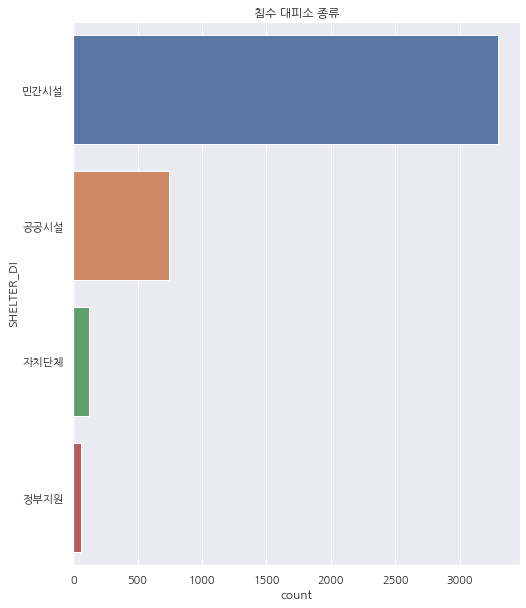

In [44]:
sns.countplot(y='SHELTER_DI', data = gyeonggi_shelter)
plt.title("침수 대피소 종류")

Text(0.5, 1.0, '지역별 대피소 개수')

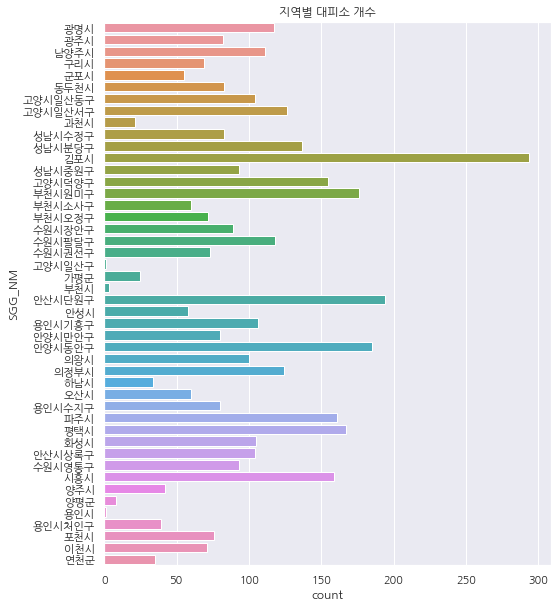

In [45]:
sns.countplot(y='SGG_NM', data = gyeonggi_shelter)
plt.title("지역별 대피소 개수")

## 5. 수집한 데이터 프레임 합치기

### 수집한 데이터 내용
#### 1. 침수위 정보 데이터
#### 2. 강수량 데이터
#### 3. 대피소 데이터
#### 세가지 데이터를 합쳐서 과거 어떤 지역 강수량이 어느정도왔는지 알 수 있고, 현재 침수 위험 지역 주변 대피소 정보를 한번에 확인할 수 있음

In [46]:
# 1. 침수위 정보 데이터
gyeonggi_level.head()

,ADM_CD,F_DSSTR_NM,F_CDTL_NM,F_BEGIN_DE,F_END_DE,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,geometry
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,20060712,20060717,"김포 풍무동,테리지구",2100000000.0,48,"POLYGON ((931712.179 1955068.577, 931702.015 1..."
1,4155012700,7.26집중호우및 제3호태풍 에위니아,"하천제방붕괴,주택파손및 농경지 매몰 침수",20060728,20060729,안성가현지구,17312302000.0,14,"POLYGON ((980571.881 1889616.679, 980568.553 1..."
2,4157025025,수해(집중호우에 의한 농경지 침수),배수로의 미정비와 상류에 비하여 하류의 하폭이 좁아 범람함,20060712,20060717,통진읍 가현리지구,2100000000.0,48,"POLYGON ((920617.723 1965150.325, 920618.160 1..."
3,4167031033,집중호우,농경지 침수,20060715,20060718,점동면 도리 일원,0.0,72,"MULTIPOLYGON (((1018238.585 1914273.964, 10182..."
4,4157010200,수해(집중호우에 의한 농경지 침수),운양배수 펌프장 배수용량 부족으로 내수에 의한 침수,20060712,20060717,"북변,걸포동지구",2100000000.0,48,"POLYGON ((931745.471 1958819.570, 931656.073 1..."


In [47]:
gyeonggi_level.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      2173 non-null   object  
 1   F_DSSTR_NM  2173 non-null   object  
 2   F_CDTL_NM   2022 non-null   object  
 3   F_BEGIN_DE  2173 non-null   object  
 4   F_END_DE    2173 non-null   object  
 5   F_DSTRC_NM  2173 non-null   object  
 6   DMG_AMT     2173 non-null   float64 
 7   FLUD_HOUR   2173 non-null   int64   
 8   geometry    2173 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(6)
memory usage: 152.9+ KB


In [48]:
# 2. 강수량 데이터
rain.head()

,행정구역코드,시간 강수량,강수 년월일시,강수 시간
0,4157000000,0.0,2006-07-13,20
1,4157000000,0.0,2006-07-13,21
2,4157000000,0.0,2006-07-13,22
3,4157000000,0.0,2006-07-13,23
4,4157000000,0.0,2006-07-13,24


In [49]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34440 entries, 0 to 34439
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역코드   34440 non-null  string 
 1   시간 강수량   34440 non-null  float64
 2   강수 년월일시  34440 non-null  object 
 3   강수 시간    34440 non-null  int64  
dtypes: float64(1), int64(1), object(1), string(1)
memory usage: 1.1+ MB


In [50]:
#3. 대피소 데이터
gyeonggi_shelter.head()

,ADM_CD,SIDO_NM,SGG_NM,DONG_NM,JIBUN,SHELTER_NM,SHELTER_DI,geometry
0,4121010400,경기도,광명시,소하1동,1294번지소하휴먼시아5단지아파트,휴먼시아5단지아파트,민간시설,POINT (189959.000 438884.000)
1,4121010400,경기도,광명시,소하1동,1324번지소하휴먼시아6단지아파트,휴먼시아6단지아파트,민간시설,POINT (190239.000 438250.000)
2,4121010400,경기도,광명시,소하1동,1273번지어울림아파트,금호어울림아파트,민간시설,POINT (190114.000 438890.000)
3,4121010400,경기도,광명시,소하1동,48번지55호동양2차아파트,동양2차아파트,민간시설,POINT (190011.000 439164.000)
4,4121010400,경기도,광명시,소하2동,940번지미도3차아파트,미도3차아파트,민간시설,POINT (189049.000 436923.000)


In [51]:
gyeonggi_shelter.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_CD      4229 non-null   object  
 1   SIDO_NM     4229 non-null   object  
 2   SGG_NM      4229 non-null   object  
 3   DONG_NM     4229 non-null   object  
 4   JIBUN       4214 non-null   object  
 5   SHELTER_NM  4229 non-null   object  
 6   SHELTER_DI  4229 non-null   object  
 7   geometry    4229 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 264.4+ KB


### 침수위 정보 데이터와 강수량 데이터 합치기

In [52]:
# 침수위정보 데이터와 강수량 데이터를 합치기
# 강수량 데이터의 강수 년월일시 데이터와 침수위정보 데이터의 침수 년월일시 데이터 형식을 맞춰야함
rain['강수 년월일시'] = pd.to_datetime(rain['강수 년월일시'])
rain.rename(columns = {'강수 년월일시':'F_BEGIN_DE'},inplace = True)
gyeonggi_level['F_BEGIN_DE'] = pd.to_datetime(gyeonggi_level['F_BEGIN_DE'])
gyeonggi_level['F_BEGIN_DE'].dt.strftime('%Y/%m/%d')
gyeonggi_level['F_END_DE'] = pd.to_datetime(gyeonggi_level['F_END_DE'])
gyeonggi_level['F_END_DE'].dt.strftime('%Y/%m/%d')
rain.head()

,행정구역코드,시간 강수량,F_BEGIN_DE,강수 시간
0,4157000000,0.0,2006-07-13,20
1,4157000000,0.0,2006-07-13,21
2,4157000000,0.0,2006-07-13,22
3,4157000000,0.0,2006-07-13,23
4,4157000000,0.0,2006-07-13,24


In [53]:
new_data = pd.merge(gyeonggi_level,rain, how = 'outer', on = 'F_BEGIN_DE')

In [54]:
new_data

,ADM_CD,F_DSSTR_NM,F_CDTL_NM,F_BEGIN_DE,F_END_DE,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,geometry,행정구역코드,시간 강수량,강수 시간
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,2.0
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,2.0,3.0
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,4.0,4.0
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2524698,NaN,NaN,NaN,2018-09-01,NaT,NaN,NaN,NaN,None,4157000000,0.0,20.0
2524699,NaN,NaN,NaN,2018-09-01,NaT,NaN,NaN,NaN,None,4157000000,0.0,21.0
2524700,NaN,NaN,NaN,2018-09-01,NaT,NaN,NaN,NaN,None,4157000000,0.0,22.0
2524701,NaN,NaN,NaN,2018-09-01,NaT,NaN,NaN,NaN,None,4157000000,0.0,23.0


In [55]:
new_data.isnull().sum()

ADM_CD        13512
F_DSSTR_NM    13512
F_CDTL_NM     14766
F_BEGIN_DE        0
F_END_DE      13512
F_DSTRC_NM    13512
DMG_AMT       13512
FLUD_HOUR     13512
geometry      13512
행정구역코드          455
시간 강수량          455
강수 시간           455
dtype: int64

In [56]:
# 합친 데이터에서 nan 값은 제거
new_data.dropna(how = 'any', inplace = True)

In [57]:
# merge로 인해 중복된 행 삭제
new_data.drop_duplicates(inplace = True)

### 앞에서 합친 데이터와 대피소 데이터 합치기

In [58]:
# 행정구역 코드를 이용해 대피소 데이터와 합치기
all_data = pd.merge(new_data,gyeonggi_shelter, how = 'outer', on = 'ADM_CD')
all_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 875398 entries, 0 to 875397
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ADM_CD      875398 non-null  object        
 1   F_DSSTR_NM  871859 non-null  object        
 2   F_CDTL_NM   871859 non-null  object        
 3   F_BEGIN_DE  871859 non-null  datetime64[ns]
 4   F_END_DE    871859 non-null  datetime64[ns]
 5   F_DSTRC_NM  871859 non-null  object        
 6   DMG_AMT     871859 non-null  float64       
 7   FLUD_HOUR   871859 non-null  float64       
 8   geometry_x  871859 non-null  geometry      
 9   행정구역코드      871859 non-null  string        
 10  시간 강수량      871859 non-null  float64       
 11  강수 시간       871859 non-null  float64       
 12  SIDO_NM     492486 non-null  object        
 13  SGG_NM      492486 non-null  object        
 14  DONG_NM     492486 non-null  object        
 15  JIBUN       492471 non-null  object        

In [59]:
# mergeo로 인해 생성된 nan값 제거
all_data.dropna(how = 'any', inplace = True)
# all_data

In [60]:
# 중복제거
all_data.drop_duplicates(inplace = True)

In [61]:
# 인덱스 리셋
all_data.reset_index(drop = True, inplace = True)
all_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 488947 entries, 0 to 488946
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ADM_CD      488947 non-null  object        
 1   F_DSSTR_NM  488947 non-null  object        
 2   F_CDTL_NM   488947 non-null  object        
 3   F_BEGIN_DE  488947 non-null  datetime64[ns]
 4   F_END_DE    488947 non-null  datetime64[ns]
 5   F_DSTRC_NM  488947 non-null  object        
 6   DMG_AMT     488947 non-null  float64       
 7   FLUD_HOUR   488947 non-null  float64       
 8   geometry_x  488947 non-null  geometry      
 9   행정구역코드      488947 non-null  string        
 10  시간 강수량      488947 non-null  float64       
 11  강수 시간       488947 non-null  float64       
 12  SIDO_NM     488947 non-null  object        
 13  SGG_NM      488947 non-null  object        
 14  DONG_NM     488947 non-null  object        
 15  JIBUN       488947 non-null  object        

In [62]:
all_data

,ADM_CD,F_DSSTR_NM,F_CDTL_NM,F_BEGIN_DE,F_END_DE,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,geometry_x,행정구역코드,시간 강수량,강수 시간,SIDO_NM,SGG_NM,DONG_NM,JIBUN,SHELTER_NM,SHELTER_DI,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488942,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",4157000000,11.0,23.0,경기도,김포시,운양동,1294번지2호,운양동 일성트루엘 타운하우스 지하대피소,민간시설,POINT (170496.000 461016.000)
488943,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",4157000000,9.0,24.0,경기도,김포시,운양동,999번지2호,운양동 성창아파트 지하대피소,민간시설,POINT (171211.000 461530.000)
488944,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",4157000000,9.0,24.0,경기도,김포시,운양동,1325번지7호,운양동 모담마을 한강화성파크드림아파트 지하대피소,민간시설,POINT (172683.000 460376.000)
488945,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",4157000000,9.0,24.0,경기도,김포시,운양동,1250번지3호,운양동 한강신도시 e편한세상아파트 지하대피소,민간시설,POINT (171762.000 461703.000)


In [63]:
all_data.head()

,ADM_CD,F_DSSTR_NM,F_CDTL_NM,F_BEGIN_DE,F_END_DE,F_DSTRC_NM,DMG_AMT,FLUD_HOUR,geometry_x,행정구역코드,시간 강수량,강수 시간,SIDO_NM,SGG_NM,DONG_NM,JIBUN,SHELTER_NM,SHELTER_DI,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)


In [64]:
all_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 488947 entries, 0 to 488946
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ADM_CD      488947 non-null  object        
 1   F_DSSTR_NM  488947 non-null  object        
 2   F_CDTL_NM   488947 non-null  object        
 3   F_BEGIN_DE  488947 non-null  datetime64[ns]
 4   F_END_DE    488947 non-null  datetime64[ns]
 5   F_DSTRC_NM  488947 non-null  object        
 6   DMG_AMT     488947 non-null  float64       
 7   FLUD_HOUR   488947 non-null  float64       
 8   geometry_x  488947 non-null  geometry      
 9   행정구역코드      488947 non-null  string        
 10  시간 강수량      488947 non-null  float64       
 11  강수 시간       488947 non-null  float64       
 12  SIDO_NM     488947 non-null  object        
 13  SGG_NM      488947 non-null  object        
 14  DONG_NM     488947 non-null  object        
 15  JIBUN       488947 non-null  object        

In [65]:
# 컬럼 이름 변경
all_data.rename(columns = {"ADM_CD":"행정구역 코드","F_DSSTR_NM":"피해원인","F_CDTL_NM":"피해상세원인","F_BEGIN_DE":"침수 시작 날짜","F_END_DE":"침수 종료 날짜","F_DSTRC_NM":"침수 지구","DMG_AMT":"피해 금액","FLUD_HOUR":"침수 시간","SIDO_NM":"대피소_도","SGG_NM":"대피소_시","DONG_NM":"대피소_동","JIBUN":"지번","SHELTER_NM":"대피소 이름","SHELTER_DI":"대피소 종류"},inplace = True)
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 지구,피해 금액,침수 시간,geometry_x,행정구역코드,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,지번,대피소 이름,대피소 종류,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",4157000000,0.0,1.0,경기도,김포시,풍무동,147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)


In [66]:
# 행정구역 코드 컬럼이 중복이므로 삭제
all_data.drop(columns = "행정구역코드",inplace = True)

In [67]:
# ['대피소_도'], ['대피소_시'],['대피소_동'],['지번'] 컬럼을 합쳐서 하나의 주소로 만들기
all_data["대피소 주소"] = all_data["대피소_도"] + "" + all_data["대피소_시"] + "" + all_data["대피소_동"] + "" + all_data["지번"]
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,지번,대피소 이름,대피소 종류,geometry_y,대피소 주소
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000),경기도김포시풍무동583번지6호
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000),경기도김포시풍무동583번지6호
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000),경기도김포시풍무동583번지6호
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000),경기도김포시풍무동583번지6호
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000),경기도김포시풍무동147번지


In [68]:
# 컬럼 재배치
col1 = all_data.columns[0:14].to_list()
col2 = all_data.columns[-1:].to_list()
col3 = all_data.columns[15:18].to_list()
new_col = col1 + col2 + col3
all_data = all_data[new_col]
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,대피소 주소,대피소 이름,대피소 종류,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)


In [69]:
# ['침수시작 날짜'] 컬럼에서 ['침수 종료 날짜'] 시간을 빼서 침수 기간 설정
all_data["침수 기간"] = all_data["침수 종료 날짜"] - all_data["침수 시작 날짜"]
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,대피소 주소,대피소 이름,대피소 종류,geometry_y,침수 기간
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000),5 days
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000),5 days
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000),5 days
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000),5 days
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000),5 days


In [70]:
# ['침수 기간'] 컬럼 위치 바꾸기
col1 = all_data.columns[0:5].to_list()
col2 = all_data.columns[-1:].to_list()
col3 = all_data.columns[5:18].to_list()
new_col = col1 + col2 + col3
all_data = all_data[new_col]
all_data

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 기간,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,대피소 주소,대피소 이름,대피소 종류,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488942,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,4 days,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",11.0,23.0,경기도,김포시,운양동,경기도김포시운양동1294번지2호,운양동 일성트루엘 타운하우스 지하대피소,민간시설,POINT (170496.000 461016.000)
488943,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,4 days,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",9.0,24.0,경기도,김포시,운양동,경기도김포시운양동999번지2호,운양동 성창아파트 지하대피소,민간시설,POINT (171211.000 461530.000)
488944,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,4 days,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",9.0,24.0,경기도,김포시,운양동,경기도김포시운양동1325번지7호,운양동 모담마을 한강화성파크드림아파트 지하대피소,민간시설,POINT (172683.000 460376.000)
488945,4157010300,2018년 집중호우,지하차도 상부도로의 범람으로 지하차도 경사로를 통행 빗물 대량으로 유입. 집수정 배...,2018-08-28,2018-09-01,4 days,장기지구,11500000.0,0.0,"POLYGON ((927628.192 1960971.223, 927654.027 1...",9.0,24.0,경기도,김포시,운양동,경기도김포시운양동1250번지3호,운양동 한강신도시 e편한세상아파트 지하대피소,민간시설,POINT (171762.000 461703.000)


In [71]:
# 피해금액 지수표현식 실수로 바꿔주기
pd.options.display.float_format = '{:.1f}'.format
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 기간,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,대피소 주소,대피소 이름,대피소 종류,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)


In [72]:
all_data.head()

,행정구역 코드,피해원인,피해상세원인,침수 시작 날짜,침수 종료 날짜,침수 기간,침수 지구,피해 금액,침수 시간,geometry_x,시간 강수량,강수 시간,대피소_도,대피소_시,대피소_동,대피소 주소,대피소 이름,대피소 종류,geometry_y
0,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (1)지하대피소,민간시설,POINT (175487.000 455060.000)
1,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (2)지하대피소,민간시설,POINT (175487.000 455060.000)
2,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (3)지하대피소,민간시설,POINT (175487.000 455060.000)
3,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동583번지6호,풍무동 유현마을 신동아아파트 (4)지하대피소,민간시설,POINT (175487.000 455060.000)
4,4157010700,수해(집중호우에 의한 농경지 침수),낮은 지형과 계양천 상류의 홍수위가 하류에 영향을 미쳐 월류 함,2006-07-12,2006-07-17,5 days,"김포 풍무동,테리지구",2100000000.0,48.0,"POLYGON ((931712.179 1955068.577, 931702.015 1...",0.0,1.0,경기도,김포시,풍무동,경기도김포시풍무동147번지,풍무동 양도마을 서해1차아파트 (1)지하대피소,민간시설,POINT (175603.000 455948.000)


In [73]:
all_data['대피소_시'].unique()

array(['김포시', '양주시', '파주시', '고양시일산서구', '평택시', '남양주시', '안성시', '고양시덕양구',
       '고양시일산동구', '시흥시', '이천시', '성남시수정구', '수원시권선구', '광명시', '구리시', '광주시',
       '용인시처인구', '포천시', '연천군'], dtype=object)

In [74]:
all_data['대피소_시'].value_counts()

광명시        200716
시흥시        141895
김포시         61368
고양시일산서구     23106
이천시         12000
성남시수정구       8400
파주시          6394
양주시          5812
고양시덕양구       5622
남양주시         5484
광주시          5384
고양시일산동구      4508
수원시권선구       2088
평택시          2004
연천군          1332
구리시          1200
안성시          1192
용인시처인구        316
포천시           126
Name: 대피소_시, dtype: int64

In [75]:
all_data['침수 기간'] = all_data['침수 기간'].dt.days

In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488947 entries, 0 to 488946
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   행정구역 코드     488947 non-null  object        
 1   피해원인        488947 non-null  object        
 2   피해상세원인      488947 non-null  object        
 3   침수 시작 날짜    488947 non-null  datetime64[ns]
 4   침수 종료 날짜    488947 non-null  datetime64[ns]
 5   침수 기간       488947 non-null  int64         
 6   침수 지구       488947 non-null  object        
 7   피해 금액       488947 non-null  float64       
 8   침수 시간       488947 non-null  float64       
 9   geometry_x  488947 non-null  geometry      
 10  시간 강수량      488947 non-null  float64       
 11  강수 시간       488947 non-null  float64       
 12  대피소_도       488947 non-null  object        
 13  대피소_시       488947 non-null  object        
 14  대피소_동       488947 non-null  object        
 15  대피소 주소      488947 non-null  object        
 16  대피

Text(0.5, 1.0, '침수 기간별 빈도수')

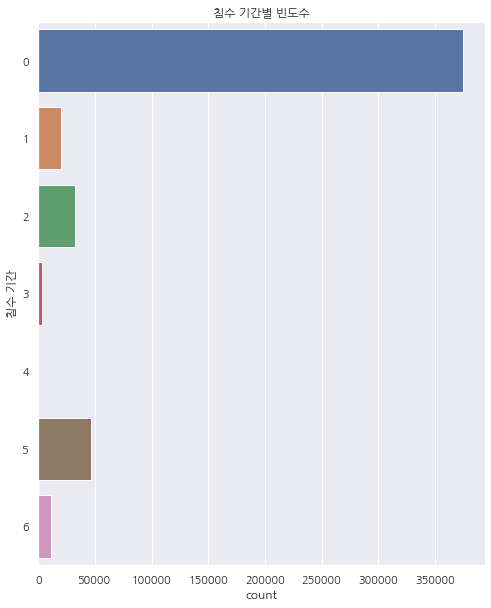

In [77]:
sns.countplot(y='침수 기간', data = all_data)
plt.title("침수 기간별 빈도수")

## 6. 시각화를 위한 국토교통부 경기도 읍면동 shp 데이터셋
##### (http://data.nsdi.go.kr/dataset/15145)


In [78]:
# 데이터 경로 저장
gyeonggi_city_data = '/content/drive/MyDrive/데이터교육양성1조/데이터 폴더_재난/국토교통부 경기도 읍면동/LSMD_ADM_SECT_UMD_41.shp'

In [79]:
# 데이터 불러오기
gyeonggi_city = gpd.read_file(gyeonggi_city_data, encoding = 'CP949')
gyeonggi_city

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,41171103,박달동,2002,41170,5945,"POLYGON ((944261.385 1934524.235, 944302.526 1..."
1,41171102,석수동,2003,41170,5946,"POLYGON ((945945.325 1935626.548, 945949.938 1..."
2,41210106,일직동,1641,41210,5947,"POLYGON ((944200.149 1935930.281, 944239.067 1..."
3,41650410,화현면,2358,41650,5778,"POLYGON ((977606.662 1992991.353, 977635.415 1..."
4,41650370,일동면,2359,41650,5779,"POLYGON ((978557.762 1994776.908, 978567.021 1..."
...,...,...,...,...,...,...
746,41820325,청평면,345,41820,4174,"POLYGON ((992881.719 1972474.536, 992888.009 1..."
747,41820310,설악면,344,41820,4175,"POLYGON ((993643.831 1963573.442, 993603.655 1..."
748,41820250,가평읍,343,41820,4176,"POLYGON ((998710.636 1972415.060, 998768.369 1..."
749,41800310,군남면,3,41800,4177,"POLYGON ((960705.790 2015245.778, 960727.917 2..."


In [80]:
gyeonggi_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EMD_CD      751 non-null    object  
 1   EMD_NM      751 non-null    object  
 2   SGG_OID     751 non-null    int64   
 3   COL_ADM_SE  751 non-null    object  
 4   GID         751 non-null    int64   
 5   geometry    751 non-null    geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 35.3+ KB


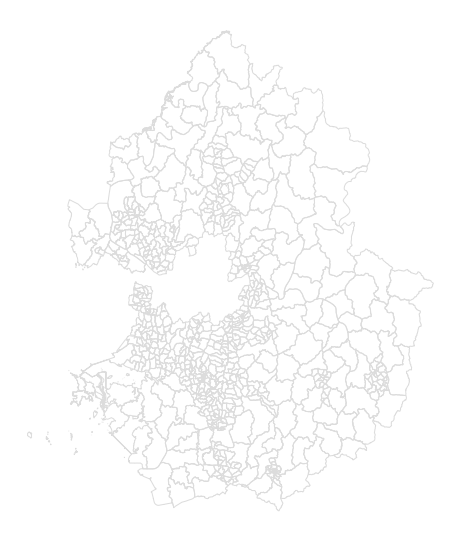

In [81]:
 ax = gyeonggi_city.plot(color = 'none', edgecolor = 'gainsboro', zorder=3, )
 ax.set_axis_off()

Text(0.5, 1.0, '경기도 내 침수지역 분포')

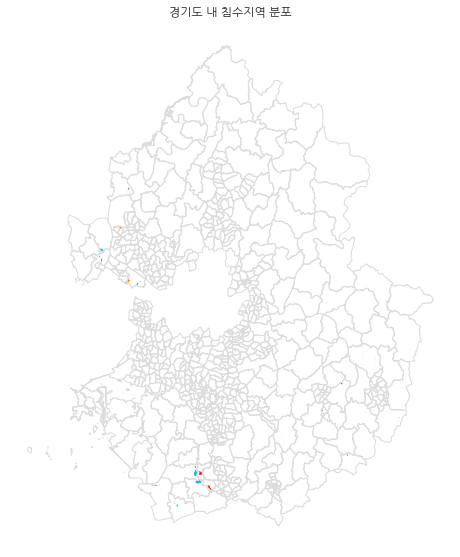

In [82]:
# 폴리곤 데이터를 활용해 경기도 내 침수위 지역 시각화
plt.rcParams['font.family'] = 'NanumGothic' # 나눔고딕으로 폰트설정
plt.rcParams['axes.unicode_minus'] = False # -값 깨짐을 방지하기 위한 설정
plt.rcParams['figure.figsize'] = (8,10)
plt.rcParams['font.size'] = 20

ax = gyeonggi_city.plot(color = 'none', edgecolor = 'gainsboro', zorder=3, )
ax.set_axis_off()
gyeonggi_level.plot(column = 'F_DSTRC_NM', ax=ax)
plt.title("경기도 내 침수지역 분포")


Text(0.5, 1.0, '경기도 내 대피소 분포')

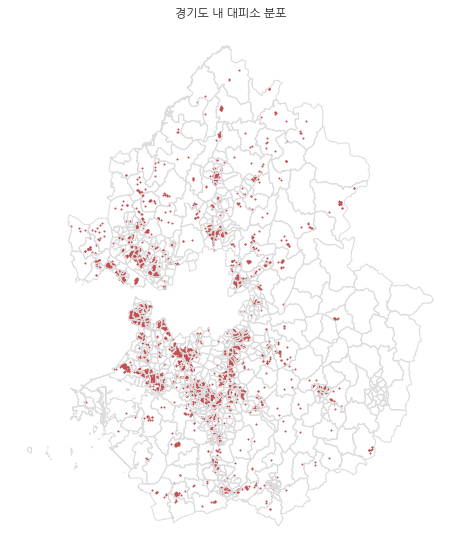

In [83]:
# 폴리곤 데이터를 활용해 대피소 위치 시각화
plt.rcParams['font.family'] = 'NanumGothic' # 나눔고딕으로 폰트설정
plt.rcParams['axes.unicode_minus'] = False # -값 깨짐을 방지하기 위한 설정
plt.rcParams['figure.figsize'] = (8,10)
plt.rcParams['font.size'] = 20

base = gyeonggi_city.plot(color = 'none', edgecolor = 'gainsboro', zorder=3, )
base.set_axis_off()
ax = gyeonggi_shelter.to_crs(epsg = 5179).plot(color = 'r',	ax=base, markersize = 1)
plt.title("경기도 내 대피소 분포")
